# Clustering

In [2]:
from dataset import SpectralData

data = SpectralData(
        domain_list = ["UNL_Maize", "UNL_Camelina", "UNL_Sorghum", "UNL_Soybean"],
        trait_list = ["N"],
        directory_path = "../data"
)


## K means 

### Input

In [3]:
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt
# import numpy as np

# max_clusters = int(np.sqrt(len(data.input)))
# inertia_values = []
# cluster_numbers = range(2, max_clusters +1)

# for k in cluster_numbers:
#     kmeans = KMeans(n_clusters = k, random_state = 42)
#     kmeans.fit(data.input)
#     inertia_values.append(kmeans.inertia_)
    
#     if k == 4:
#         assignments = kmeans.predict(data.input)
#         centroids = kmeans.cluster_centers_
#         inertia_value = kmeans.inertia_
    
# plt.scatter(cluster_numbers, inertia_values)
# plt.show()

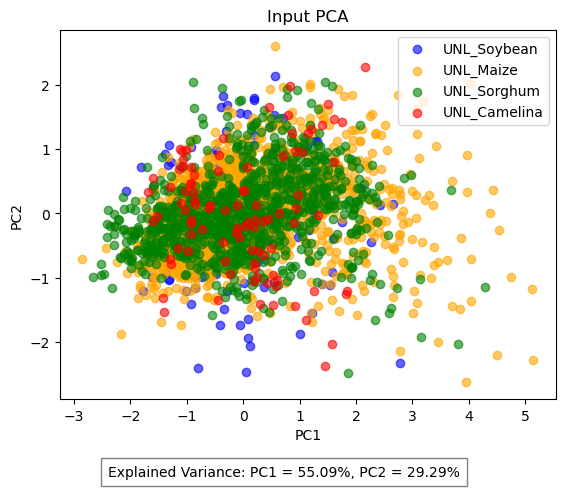

In [37]:

from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import StandardScaler

domains = ["UNL_Soybean", "UNL_Maize", "UNL_Sorghum", "UNL_Camelina"]
palette = {
    "UNL_Soybean": "blue",
    "UNL_Maize": "orange",
    "UNL_Sorghum": "green",
    "UNL_Camelina": "red"
}

def create_pca(domains):
    data = {
        'PC1': list(),
        'PC2': list(),
        'Domain': list(),
    }
    for index, domain in enumerate(domains):
        base_data = SpectralData(
            domain_list = [domain],
            #hsr_columns = [str(wavelength) for wavelength in range(650,750)],
            trait_list = ["N"],
            normalization = True,
            directory_path = "../data"
        )
        
        if index == 0:
            pca = PCA(n_components = 2)
            pca_scaler = StandardScaler()
            components = pca.fit_transform(base_data.input)
            components = pca_scaler.fit_transform(components)
            explained_variance = pca.explained_variance_ratio_
        else:
            components = pca.transform(base_data.input)
            components = pca_scaler.transform(components)
        
        data['PC1'].extend(components[:,0])
        data['PC2'].extend(components[:,1])
        data['Domain'].extend([domain]*len(components[:,0]))
    
    return pd.DataFrame(data), explained_variance
        

def plot_pca(domains, palette):
    data_frame, explained_variance = create_pca(domains)
    
    for domain in domains:
        domain_data = data_frame[data_frame['Domain'] == domain]
        plt.scatter(domain_data['PC1'], domain_data['PC2'], 
                    color=palette[domain], label=domain, alpha=0.6)
    
    # for domain in domains:
    #     domain_data = data_frame[data_frame['Domain'] == domain]
    #     sns.kdeplot(x=domain_data['PC1'], y=domain_data['PC2'], 
    #                 color=palette[domain], alpha=0.5, levels=[0.05])
    
    explained_text = f"Explained Variance: PC1 = {explained_variance[0]*100:.2f}%, PC2 = {explained_variance[1]*100:.2f}%"
    plt.figtext(0.2, -0.05, explained_text, fontsize=10, bbox={"facecolor": "white", "alpha": 0.5, "pad": 5})
    
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Input PCA')
    plt.legend()
    plt.show()

plot_pca(domains, palette)

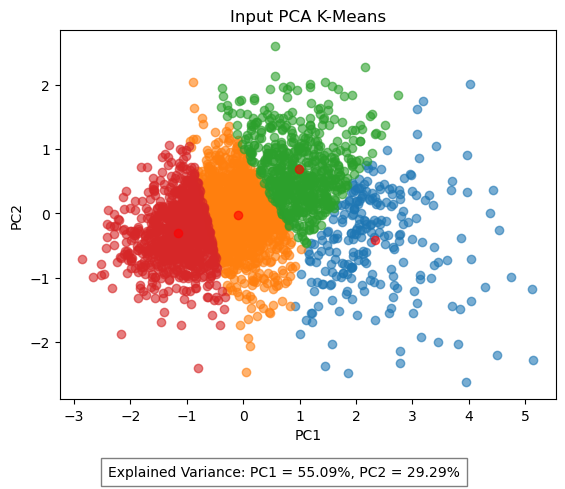

In [41]:
from sklearn.metrics import explained_variance_score


def plot_kmeans_cluster(domains, cluster_number = 4):
    from sklearn.cluster import KMeans
    data_frame, explained_variance = create_pca(domains)

    # Kmeans
    kmeans = KMeans(n_clusters = cluster_number)
    kmeans.fit(data_frame[["PC1", "PC2"]])
    
    assignments = kmeans.predict(data_frame[["PC1", "PC2"]])
    centroids = kmeans.cluster_centers_
    inertia_value = kmeans.inertia_
    
    # Plot clusters
    for cluster in range(cluster_number):
        cluster_points = data_frame[assignments == cluster]
        plt.scatter(cluster_points["PC1"], cluster_points["PC2"], alpha=0.6)
    plt.scatter(centroids[:,0], centroids[:,1], c = "red", alpha=0.6)
    
    explained_text = f"Explained Variance: PC1 = {explained_variance[0]*100:.2f}%, PC2 = {explained_variance[1]*100:.2f}%"
    plt.figtext(0.2, -0.05, explained_text, fontsize=10, bbox={"facecolor": "white", "alpha": 0.5, "pad": 5})
    
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Input PCA K-Means')
    plt.show()
        
plot_kmeans_cluster(domains)

### Target 

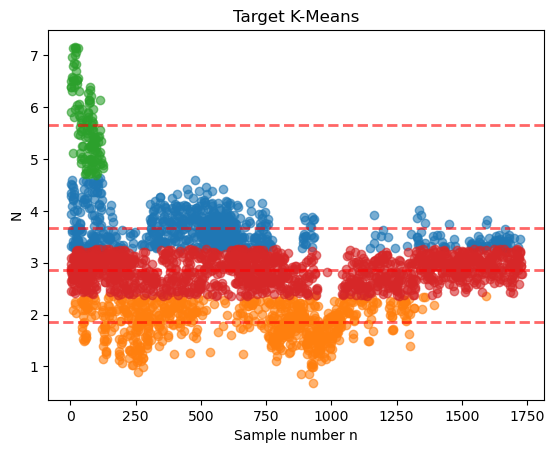

In [50]:
def create_frame(domains):
    data = {
        "Sample_number": list(),
        "Target": list(),
        "Domain": list(),
    }
    
    for domain in domains:
        base_data = SpectralData(
            domain_list = [domain],
            trait_list = ["N"],
            normalization = False,
            directory_path = "../data"
        )
        
        data["Sample_number"].extend(range(1, len(base_data.target)+1))
        data["Target"].extend(base_data.target)
        data["Domain"].extend([domain]*len(base_data.target))
        
    return pd.DataFrame(data)

def plot_kmeans_target_cluster(domains, cluster_number = 4):
    from sklearn.cluster import KMeans
    
    data_frame = create_frame(domains)

    # Kmeans
    kmeans = KMeans(n_clusters = cluster_number)
    kmeans.fit(data_frame[[ "Target"]])
    
    assignments = kmeans.predict(data_frame[[ "Target"]])
    centroids = kmeans.cluster_centers_
    inertia_value = kmeans.inertia_
    
    # Plot clusters
    for cluster in range(cluster_number):
        cluster_points = data_frame[assignments == cluster]
        plt.scatter(cluster_points["Sample_number"], cluster_points["Target"], alpha = 0.6)
    for centroid in centroids:
        plt.axhline(y=centroid, color='red', linestyle='--', linewidth=2, label="Threshold", alpha = 0.6)

    plt.xlabel('Sample number n')
    plt.ylabel('N')
    plt.title('Target K-Means')
    plt.show()
        
plot_kmeans_target_cluster(domains)

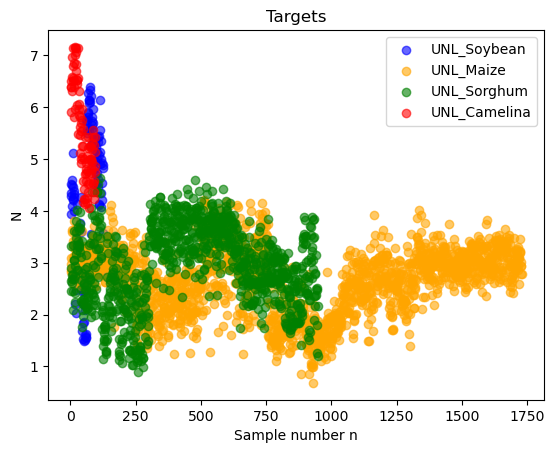

In [54]:
def plot_targets(domains, palette):
    data_frame = create_frame(domains)
    
    for domain in domains:
        domain_data = data_frame[data_frame['Domain'] == domain]
        plt.scatter(domain_data['Sample_number'], domain_data['Target'], 
                    color=palette[domain], label=domain, alpha=0.6)
    
    plt.xlabel('Sample number n')
    plt.ylabel('N')
    plt.title('Targets')
    plt.legend()
    plt.show()

plot_targets(domains, palette)

# Gaussian Mixture

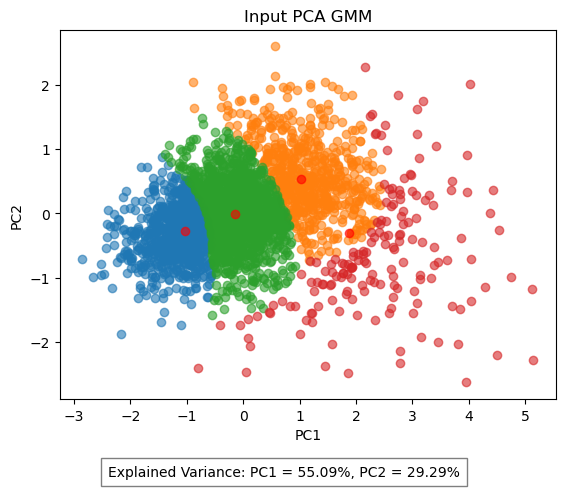

In [46]:
def plot_gmm_cluster(domains, cluster_number = 4):
    from sklearn.mixture import GaussianMixture
    data_frame, explained_variance = create_pca(domains)

    # Gaussian
    gmm = GaussianMixture(n_components = cluster_number)
    gmm.fit(data_frame[["PC1", "PC2"]])
    
    assignments = gmm.predict(data_frame[["PC1", "PC2"]])
    centroids = gmm.means_
    
    # Plot clusters
    for cluster in range(cluster_number):
        cluster_points = data_frame[assignments == cluster]
        plt.scatter(cluster_points["PC1"], cluster_points["PC2"], alpha=0.6)
    plt.scatter(centroids[:,0], centroids[:,1], c = "red", alpha=0.6)
    explained_text = f"Explained Variance: PC1 = {explained_variance[0]*100:.2f}%, PC2 = {explained_variance[1]*100:.2f}%"
    plt.figtext(0.2, -0.05, explained_text, fontsize=10, bbox={"facecolor": "white", "alpha": 0.5, "pad": 5})
    
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Input PCA GMM')
    plt.show()
        
plot_gmm_cluster(domains)


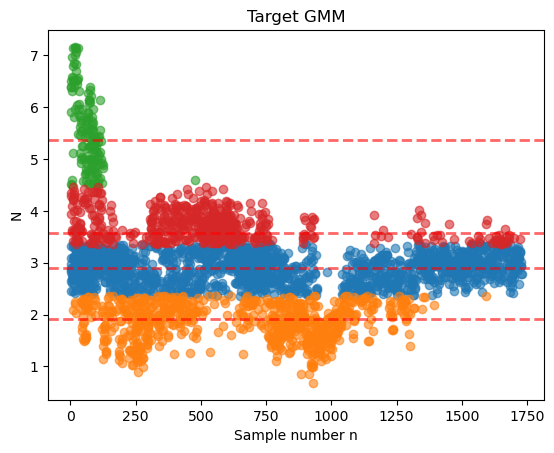

In [53]:
def plot_gaussian_target_cluster(domains, cluster_number = 4):
    from sklearn.mixture import GaussianMixture
    
    data_frame = create_frame(domains)

    # GMM
    gmm = GaussianMixture(n_components = cluster_number)
    gmm.fit(data_frame[[ "Target"]])
    
    assignments = gmm.predict(data_frame[[ "Target"]])
    centroids = gmm.means_
    
    # Plot clusters
    for cluster in range(cluster_number):
        cluster_points = data_frame[assignments == cluster]
        plt.scatter(cluster_points["Sample_number"], cluster_points["Target"], alpha=0.6)
        
    for centroid in centroids:
        plt.axhline(y=centroid, color='red', linestyle='--', linewidth=2, label="Threshold", alpha = 0.6)

    plt.xlabel('Sample number n')
    plt.ylabel('N')
    plt.title('Target GMM')
    plt.show()
    plt.show()
        
plot_gaussian_target_cluster(domains)